# Clustering
Data-driven football analysis has become a huge part of understanding matches and describing a team's attacking and defending output. Our data provides valuable information on the expected goals (xG) and expected goals against (xGA) of all World Cup matches from 2018 onwards. These values are of great interest, as they are a very good indication of the actual danger in front of goal, compared to “traditional” match info. While earlier football analysis focused on attempted shots and shots on goal, these days the teams xG and xGA show a clearer picture of the team’s performance. If a match ends with a shot-on-goal ratio of 30:2 between Team A and Team B, but a score of 0:2, one might see this game as a dominant but unlucky performance of Team A. In reality, Team B might have defended well and forced their opponent to long-distance shots, while only needing two shots on goal themselves to win the game.
“Expected Goals” is the sum of the probability of a goal of all shots attempted by one team. Each attempt is valued between 0 and 1 and depends on the position on the field, where the shot is taken. A shot from outside the 16-yard box is very unlikely to hit the goal, so its xG-value may only be around 0.03, while a penalty kick has a value of 0.75. The probability of goal is derived from multiple attempted shots from many leagues. The xG-value of one Team A is the xGA-value of Team B. To measure an over- or underperformance, we look at the difference between the scored Goals and their corresponding xG value. Scoring more goals than expected usually indicates a lucky or very good performance. For goals against it is the opposite, so we look at the difference between expected goals conceded and goals conceded.
To see all the teams performances we first have to retriev the data from out table that consists of the nation, the year of the tournament, their sum of G-xG and xGA-GA and their result in that year. We create the array X which contains all values of the coloums "SUM(G-xG)" and "SUM(xGA-GA)".
We will perform plotting, K-Means, DBSCAN and Silhouette-Score during this work. So we import multiple modules first. We exported the data from Excel, which leads to ';' being the seperator, which we indicated in the read function.

In [33]:
# Import all needed modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Load data from CSV file
data = pd.read_csv(r"C:\Users\eikes\Desktop\Export_DBM2.csv", sep=';')

# Extract relevant columns for clustering (assuming they are 0-indexed)
X = data.iloc[:, [2, 3]].values  # Columns 3 and 4 (0-indexed)

By plotting a team’s cummulative G-xG and xGA-GA-values in a diagram we obtain the following data. The x-axis describes the G-xG-value, the y-axis describes the xGA-GA values of each nations performance. The higher the value, the better the team performed:

C:\Users\eikes\AppData\Local\Temp\ipykernel_33368\2983129107.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], s=50, cmap='viridis')


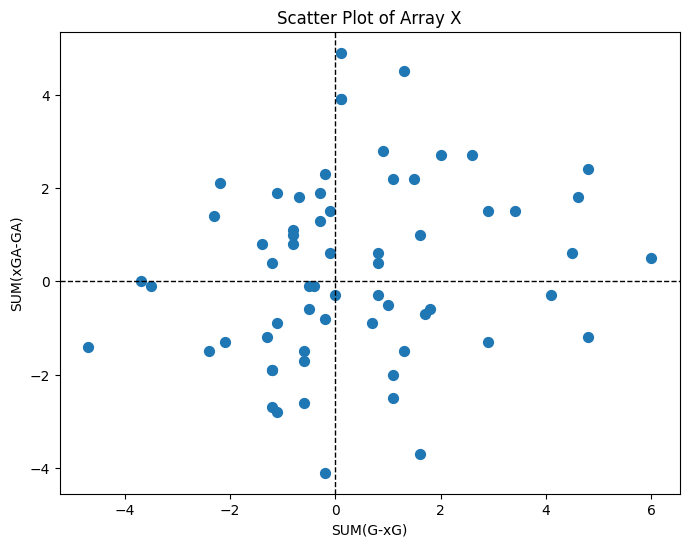

In [34]:
# Plotting the array X
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], s=50, cmap='viridis')
plt.xlabel('SUM(G-xG)')
plt.ylabel('SUM(xGA-GA)')
plt.title('Scatter Plot of Array X')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.axvline(0, color='black', linestyle='--', linewidth=1)
plt.show()

As this is a shape that is neither clearly concave nor convex, we will try different methods of clustering, that are good for both shapes: K-means and DBSCAN.
 
## K-means:
The K-Means method is a partition-based clustering algorithm that finds k clusters, which each have a centroid of the mean value of the data from one cluster. The process works by determining the number of clusters “k”, placing k centroids randomly on our data and assigning each data point to the nearest centroid. After that, each centroid is adjusted by changing its value/coordinates to the 
Too few clusters might lead to big differences between data points within one cluster, while too many clusters might not give better insights to the understanding of the data. We look into two approaches to find the optimal number of clusters:
-	Empirical method: k = sqrt(n/2), with n = number of points
    In our case, we look at 64 points, so k = 5,66. 
-	Elbow method
    The elbow method looks at the sum of variance within one cluster. The method applies the K-Means algorithm from 1 to 10 clusters and calculates the variance. 

To perform the elbow method, we create the array sse to store the sum of squared errors for the various iterations of k. We do that by creating a loop that performs the K-Means method to X for 1 to 10 clusters. The sum of squared errors for each iteration gets stored in sse.
The KMeans-function needs a random_state to determine the starting points for the centroids. We chose 50, which will explain later.


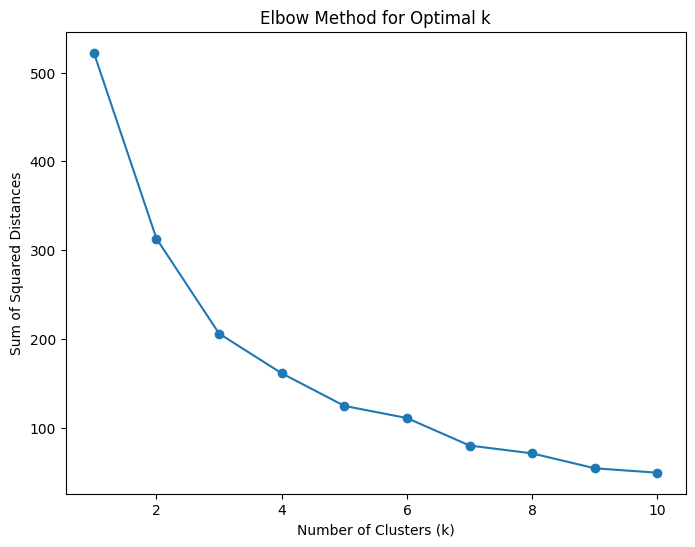

In [35]:
# Initialize an empty list to store SSE (Sum of Squared Errors) for each value of k
sse = []

# Apply KMeans clustering for each value of k
for k in  range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=50)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)  # inertia_ attribute gives the SSE

# Plot SSE against number of clusters (k)
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method for Optimal k')
plt.show()

This gives us an elbow shape that does not clearly show the desired shape. But looking at the empirical value we decided to go for k = 5.
With this information in mind, we can perform K-Means for k/n_clusters = 5 and random_state = 50. We use "k-means++" to find better starting points for the centroids.   

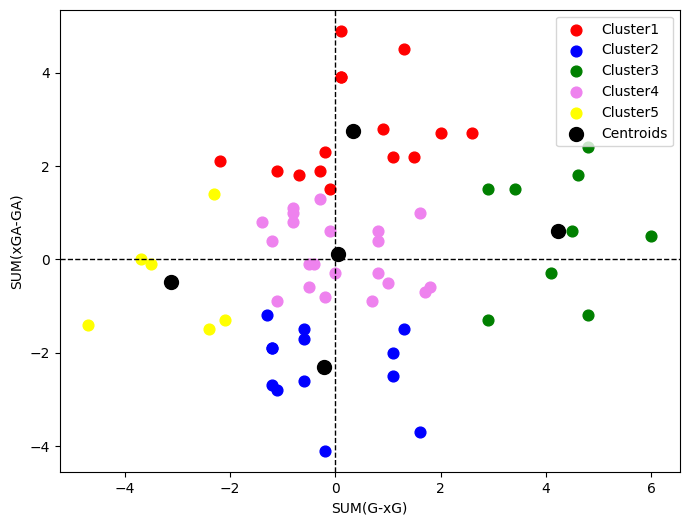

In [36]:
#KMeans calculation for k = 5
kmeans = KMeans(n_clusters =  5, init = "k-means++", random_state = 50)
y_kmeans = kmeans.fit_predict(X)

#KMeans plotting
plt.figure(figsize=(8, 6))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 60, c = 'red', label = 'Cluster1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 60, c = 'blue', label = 'Cluster2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 60, c = 'green', label = 'Cluster3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 60, c = 'violet', label = 'Cluster4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 60, c = 'yellow', label = 'Cluster5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')
plt.xlabel(r'SUM(G-xG)')
plt.ylabel(r'SUM(xGA-GA)')
plt.legend()

# Add horizontal and vertical lines through zero
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.axvline(0, color='black', linestyle='--', linewidth=1)

#Plot figures
plt.show()

We performed K-Means with various values for random_state. Just by eye test we found random_state = 50 to give us a very plausible result. The clusters can be described as either very good or bad in attack (Cluster3/green, Cluster5/yellow) or defense (Cluster1/red, Cluster2/blue). There is also a cluster of mediocre teams that do not stand out a lot (Cluster4/Pink).
A more objective way to look at the internal Silhouette-Score for each cluster. This score takes into account the distance of all points of one cluster to another and the distance from points of one cluster to another. Since we decided to stick to k = 5, we calculated all average Silhouette scores of all five clusters for random_state = 1…1000 to find the best value.

In [37]:
# Calculate average silhouette score for different random_state values
random_state_values = range(1, 1000)
silhouette_scores = []

for random_state in random_state_values:
    kmeans = KMeans(n_clusters=5, init='k-means++', random_state=random_state)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

This code utilizes the function silhouette_score to calculate the Silhouette-Score for each iteration of random_state.
To find the highest value of the Score, we simply look for the highest value in the array silhouette_scores and plot it. To help find the highest value, we create a red line in our plot that shows the random_state for the highest Silhouette-Score.

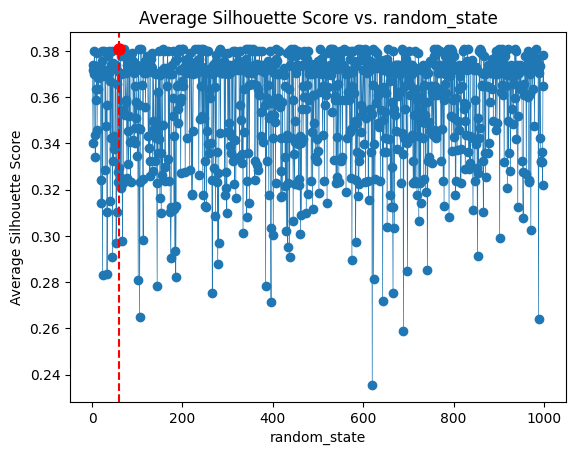

In [38]:
# Find the index of the highest silhouette score
max_score_index = silhouette_scores.index(max(silhouette_scores))
max_random_state = random_state_values[max_score_index]
max_score = silhouette_scores[max_score_index]

# Plotting the average silhouette score vs. random_state
plt.plot(random_state_values, silhouette_scores, marker='o', linewidth=0.5)
plt.title('Average Silhouette Score vs. random_state')
plt.xlabel('random_state')
plt.ylabel('Average Silhouette Score')

# Mark the highest silhouette score in red
plt.plot(max_random_state, max_score, marker='o', markersize=8, color='red')
plt.axvline(x=max_random_state, linestyle='--', color='red')

plt.show()

This results in the best Silhouette-Score of around 0.381 for random_state = 58. This values results in the following cluster distribution:

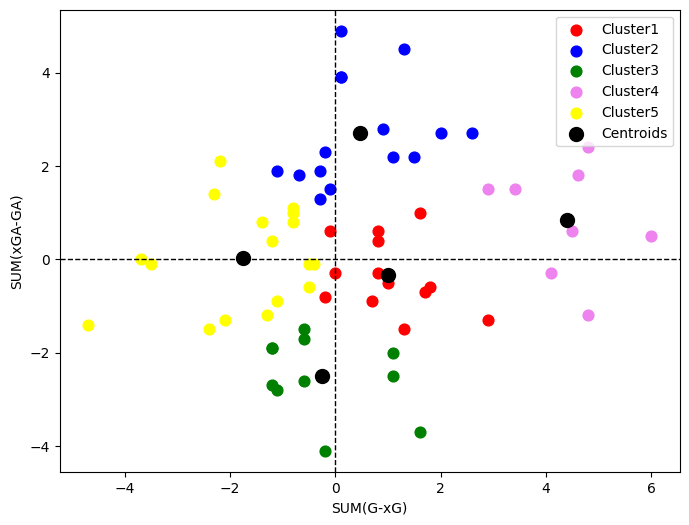

In [39]:
#KMeans calculation for k = 5 and random_state = 58
kmeans = KMeans(n_clusters =  5, init = "k-means++", random_state = 58)
y_kmeans = kmeans.fit_predict(X)

#KMeans plotting
plt.figure(figsize=(8, 6))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 60, c = 'red', label = 'Cluster1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 60, c = 'blue', label = 'Cluster2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 60, c = 'green', label = 'Cluster3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 60, c = 'violet', label = 'Cluster4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 60, c = 'yellow', label = 'Cluster5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')
plt.xlabel(r'SUM(G-xG)')
plt.ylabel(r'SUM(xGA-GA)')
plt.legend()

# Add horizontal and vertical lines through zero
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.axvline(0, color='black', linestyle='--', linewidth=1)

#Plot figures
plt.show()


It is close to the fist figure, as the centroids also resembles a cross. In comparison, the Silhouette-Score of the figure for random_state = 50 is around 0.373. These values are not great, as they are closer to 0 than to 1. But we are happy with the results, as both cluster variations give us a better view of the data and help us understand the distribution of our datapoints.

## DBSCAN
Since we were not sure which clustering method suits our data the best, we will also perform DBSCAN. It is a density based algorithm so it is very good at handling outliers. There are two parameters that have be defined.
-	eps:  Maximum radius of the neighborhood
    This value determines the size of a cluster
-	min_samples: Minimum number of points in the eps-neighborhood of a cluster
    This is the threshold that has to be met to form a cluster 
 
Instead of going through parameters by hand, we start off with using the silhouette score to find the best combination of eps and min_samples. First we define the range of eps to be between 0.2 and 2 in steps of 0.1. For min_samples we choose a range from 2 to 5.
To calculate the Silhouette score, we set up two loops that go through both ranges and calculates the slihouette score when at least two clusters are found. The resulting graph shows the average Silhouette-Score for each combination of eps and min_samples.  

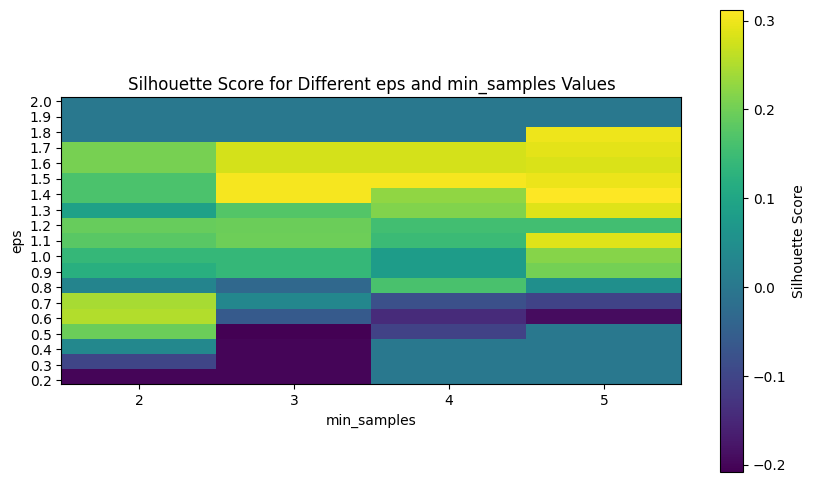

In [40]:
# Define a range of values for eps and min_samples
eps_range = np.arange(0.2, 2.1, 0.1)
min_samples_range = range(2, 6)

silhouette_scores = np.zeros((len(eps_range), len(min_samples_range)))

# Loop through each combination of eps and min_samples
for i, eps in enumerate(eps_range):
    for j, min_samples in enumerate(min_samples_range):
        # Apply DBSCAN with current parameters
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X)
        
        # Check if the number of clusters is at least 2
        if len(np.unique(labels)) >= 2:
            # Calculate silhouette score
            silhouette_avg = silhouette_score(X, labels)
            silhouette_scores[i, j] = silhouette_avg
        else: silhouette_scores[i, j] = 0

# Plotting the heatmap
plt.figure(figsize=(10, 6))
plt.imshow(silhouette_scores, cmap='viridis', origin='lower', extent=[min_samples_range[0]-0.5, min_samples_range[-1]+0.5, eps_range[0]-0.025, eps_range[-1]+0.025])
plt.colorbar(label='Silhouette Score')
plt.xlabel('min_samples')
plt.ylabel('eps')
plt.title('Silhouette Score for Different eps and min_samples Values')
plt.xticks(min_samples_range)
plt.yticks(eps_range)
plt.grid(False)
plt.show()

This gives us the ideal combination of eps = 1.4 and min_samples = 5. Applying DBSCAN clustering using these values we can plot the resulting clustered points. All points that do not belong to any cluster are considered outliers and have the value '-1'. As we are interested in seeing these points, we seperate the clustered points from the outliers and plot both. 

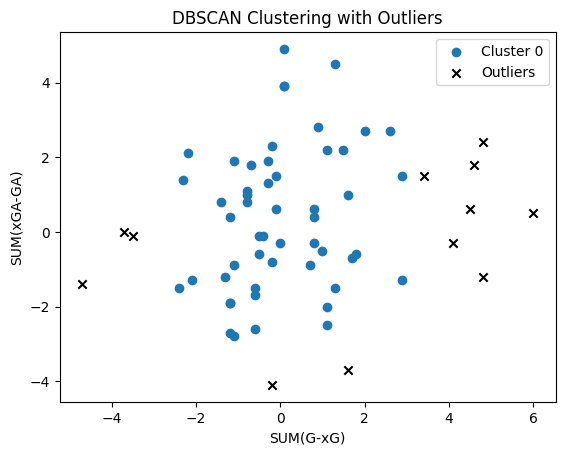

In [41]:
# Apply DBSCAN clustering
dbscan = DBSCAN(eps=1.4, min_samples=5)
y_dbscan = dbscan.fit_predict(X)

# Separate clustered points from outliers
clustered_points = X[y_dbscan != -1]
outliers = X[y_dbscan == -1]

# Plot clustered points
for cluster_label in np.unique(y_dbscan[y_dbscan != -1]):
    plt.scatter(X
[y_dbscan == cluster_label, 0], X
[y_dbscan == cluster_label, 1], label=f'Cluster {cluster_label}')

# Plot outliers
plt.scatter(outliers[:, 0], outliers[:, 1], c='black', marker='x', label='Outliers')

# Add legend, labels and show plot
plt.legend()
plt.xlabel('SUM(G-xG)')
plt.ylabel('SUM(xGA-GA)')
plt.title('DBSCAN Clustering with Outliers')
plt.show()

Unfortunatly this results in only one cluster in the middle and a few outliers around. This approach does not work for our case. By trial and error we can find eps and min_samples combinations where more Clusters appear. Such is the case for eps = 0.8, min_sample = 2. But this only results in a Silhouette-Score of 0.087.

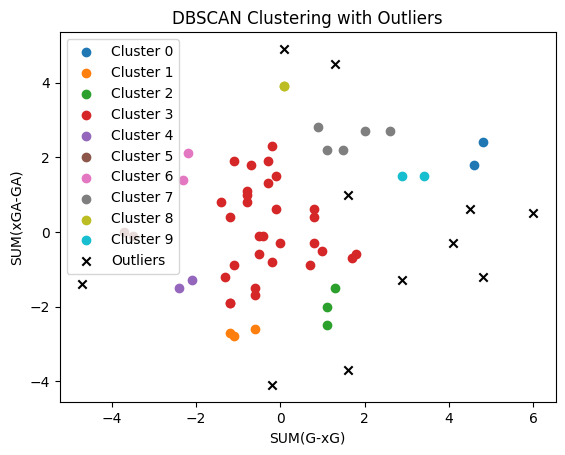

The Silhouette-Score for eps = 0.8 and min_samples = 2 is  0.08697009693490013


In [42]:
# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.8, min_samples=2)
y_dbscan = dbscan.fit_predict(X)

# Separate clustered points from outliers
clustered_points = X[y_dbscan != -1]
outliers = X[y_dbscan == -1]

# Plot clustered points
for cluster_label in np.unique(y_dbscan[y_dbscan != -1]):
    plt.scatter(X
[y_dbscan == cluster_label, 0], X
[y_dbscan == cluster_label, 1], label=f'Cluster {cluster_label}')

# Plot outliers
plt.scatter(outliers[:, 0], outliers[:, 1], c='black', marker='x', label='Outliers')

# Add legend, labels and show plot
plt.legend()
plt.xlabel('SUM(G-xG)')
plt.ylabel('SUM(xGA-GA)')
plt.title('DBSCAN Clustering with Outliers')
plt.show()

# Calculate and print silhouette score
s_score = silhouette_score(X, y_dbscan)
print('The Silhouette-Score for eps = 0.8 and min_samples = 2 is ',s_score)

We tried various combinations of eps and min_samples, but just couldn't find one with good clustering. It appears that DBSCAN is not a suitable method for clustering for our data.

## Summary
We did find interesting clustering using the K-Means method. Althought the Silhouette score is not particularly high, we still have clusters that see to split the data in logical clusters. We can clearly see the seperation for good and bad performance for both offense and defense.
Unfortunatly we could not find a good configuration for DBSCAN. All combination we tried ended in either too few or too many clusters. Also the Silhouette-Score was considerably smaller than for K-Means.

An improvement to the clustering can be made by collecting more data points. The collection of data, in particular xG and xGA, is quite new. Since World Cups only take place every four years and has around 32 participating nations, the data won't increase by a lot soon. 